In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, root_mean_squared_error, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

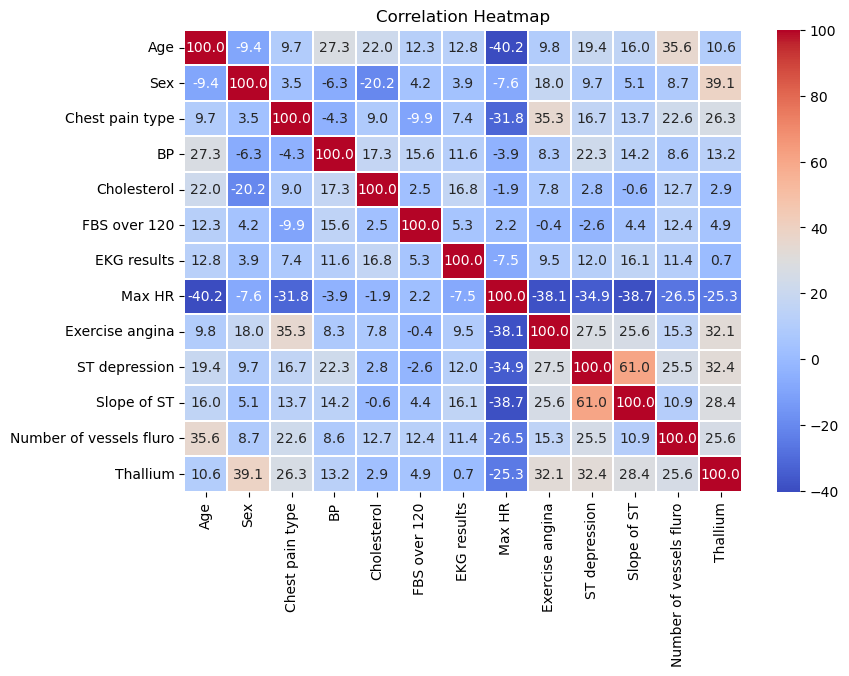

In [5]:
#Corelations between features without target
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr() * 100

plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
#Mapping Heart Disease
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

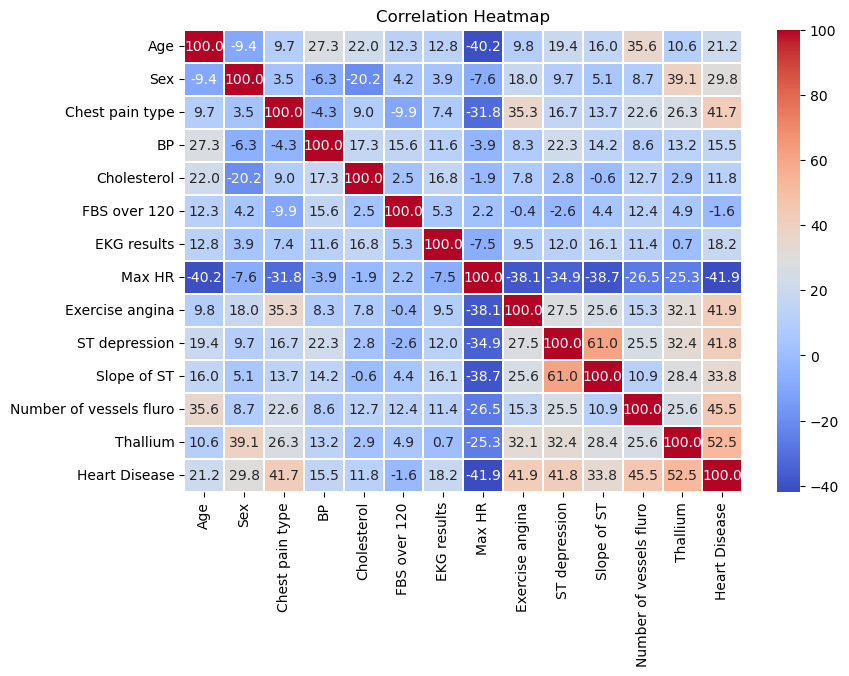

In [7]:
#Correlations WITH Heart Disease after mapping to 1 & 0
df_corr_matrix = df.corr() * 100

plt.figure(figsize=(9, 6))
sns.heatmap(df_corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
#Correlations based on all features
corrabs = numeric_df.corr().abs()
unstackcorr = corrabs.unstack()
sosorted = unstackcorr.sort_values(kind="quicksort", ascending=False)
print(sosorted.head(30))

Age                      Age                        1.000000
Sex                      Sex                        1.000000
Number of vessels fluro  Number of vessels fluro    1.000000
Slope of ST              Slope of ST                1.000000
ST depression            ST depression              1.000000
Exercise angina          Exercise angina            1.000000
Max HR                   Max HR                     1.000000
FBS over 120             FBS over 120               1.000000
Cholesterol              Cholesterol                1.000000
BP                       BP                         1.000000
Chest pain type          Chest pain type            1.000000
EKG results              EKG results                1.000000
Thallium                 Thallium                   1.000000
ST depression            Slope of ST                0.609712
Slope of ST              ST depression              0.609712
Max HR                   Age                        0.402215
Age                     

In [9]:
df = df.select_dtypes(include=['number'])
correl = df.corr(method='spearman')
target_correlations = correl['Heart Disease'].abs().sort_values(ascending=False)
print(target_correlations)

Heart Disease              1.000000
Thallium                   0.525270
Number of vessels fluro    0.481573
Chest pain type            0.470066
Max HR                     0.419741
Exercise angina            0.419303
ST depression              0.405359
Slope of ST                0.363182
Sex                        0.297721
Age                        0.226405
EKG results                0.182071
Cholesterol                0.162530
BP                         0.131147
FBS over 120               0.016319
Name: Heart Disease, dtype: float64


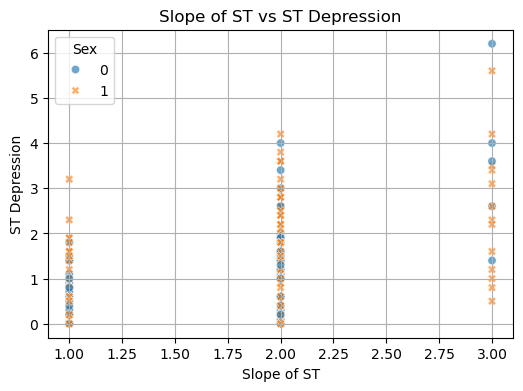

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Slope of ST', y='ST depression', hue='Sex', style='Sex', alpha=.65)
plt.title("Slope of ST vs ST Depression")
plt.xlabel("Slope of ST")
plt.ylabel("ST Depression")
plt.legend(title='Sex')
plt.grid(True)
plt.show()

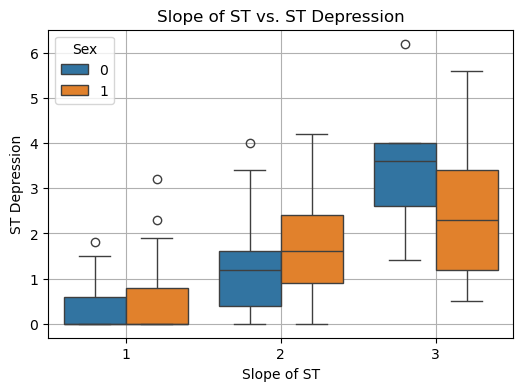

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Slope of ST', y='ST depression', hue='Sex')
plt.title("Slope of ST vs. ST Depression")
plt.xlabel("Slope of ST")
plt.ylabel("ST Depression")
plt.legend(title='Sex')
plt.grid(True)
plt.show()

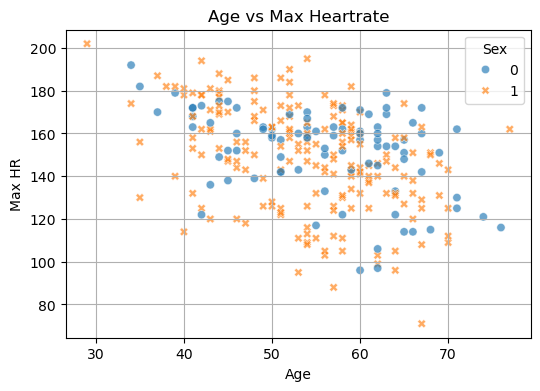

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Age', y='Max HR', hue="Sex", style='Sex', alpha=.65)
plt.title("Age vs Max Heartrate")
plt.xlabel("Age")
plt.ylabel("Max HR")
plt.legend(title='Sex')
plt.grid(True)
plt.show()

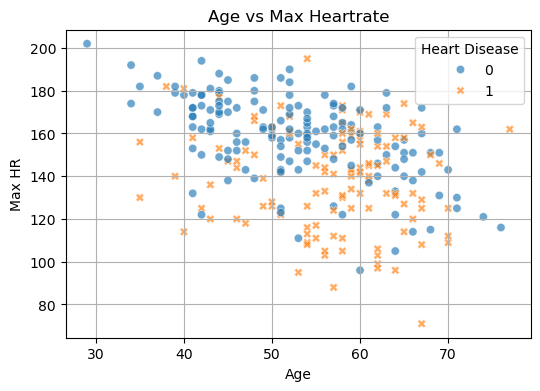

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Age', y='Max HR', hue='Heart Disease', style='Heart Disease', alpha=.65)
plt.title("Age vs Max Heartrate")
plt.xlabel("Age")
plt.ylabel("Max HR")
plt.legend(title='Heart Disease')
plt.grid(True)
plt.show()

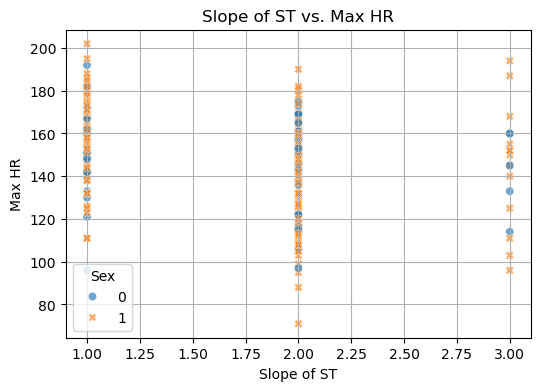

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Slope of ST', y='Max HR', hue='Sex', style='Sex', alpha=.65)
plt.title("Slope of ST vs. Max HR")
plt.xlabel("Slope of ST")
plt.ylabel("Max HR")
plt.legend(title='Sex')
plt.grid(True)
plt.show()

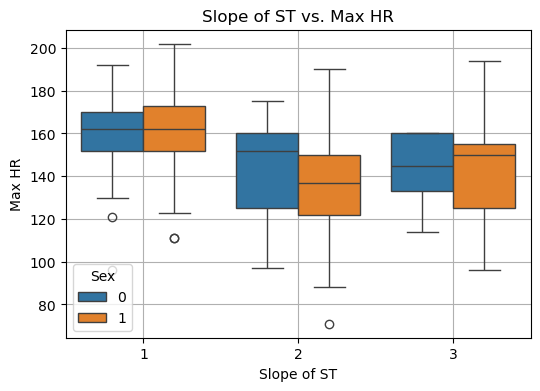

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Slope of ST', y='Max HR', hue='Sex')
plt.title("Slope of ST vs. Max HR")
plt.xlabel("Slope of ST")
plt.ylabel("Max HR")
plt.legend(title='Sex')
plt.grid(True)
plt.show()

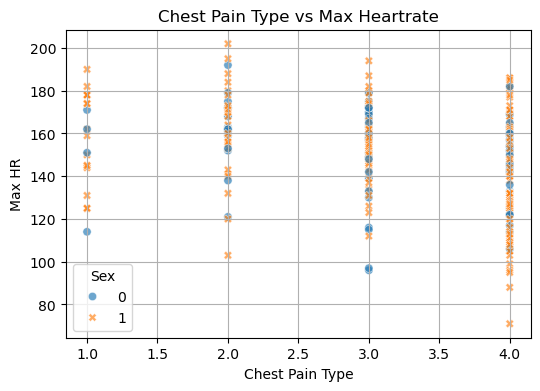

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Chest pain type', y='Max HR', hue='Sex', style='Sex', alpha=.65)
plt.title("Chest Pain Type vs Max Heartrate")
plt.xlabel("Chest Pain Type")
plt.ylabel("Max HR")
plt.legend(title='Sex')
plt.grid(True)
plt.show()

In [17]:
def display_two_numeric_features(col1, col2, df):
    x1 = df[col1]
    x2 = df[col2]
    fig, ax = plt.subplots()
    ax.scatter(x1,x2)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    plt.figure(figsize=(6,4))
    plt.show()

def display_two_categorical_features(col1, col2, df):
    plt.title("FEATURES : \n"+col1+"\n "+col2)
    mx = pd.crosstab(df[col1], df[col2])
    sns.heatmap(mx, fmt=".1f", annot=True);

def display_three_categorical_features(col1, col2, col3, df):
    plt.title("FEATURES : \n"+col1+"\n vs.\n"+col2+" AND "+col3)
    mx = pd.crosstab(df[col1], [df[col2], df[col3]])
    sns.heatmap(mx, fmt= ".1f", annot=True);

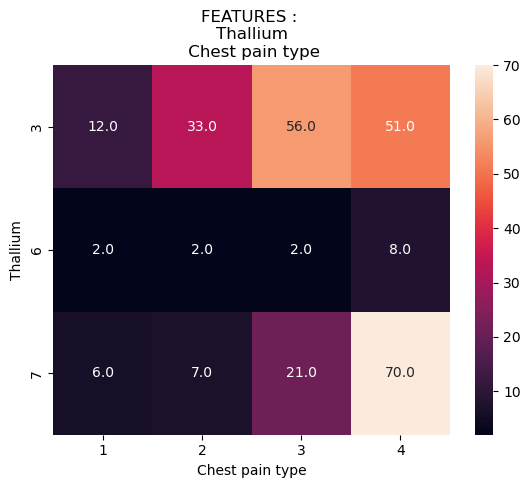

In [18]:
display_two_categorical_features("Thallium", "Chest pain type", df)

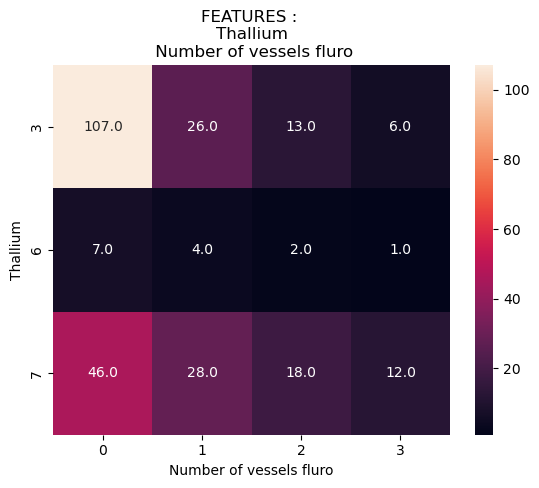

In [19]:
display_two_categorical_features("Thallium", "Number of vessels fluro", df)

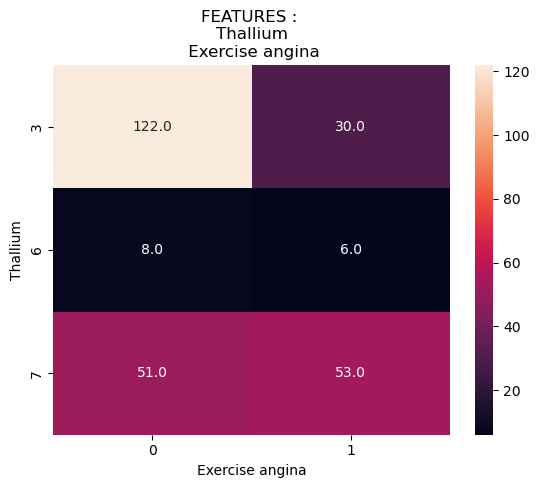

In [20]:
display_two_categorical_features("Thallium", "Exercise angina", df)

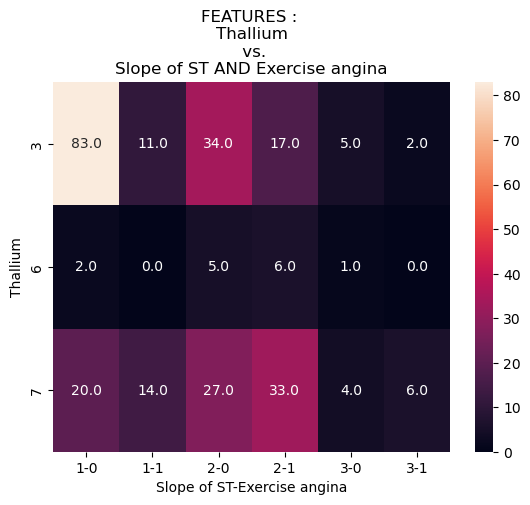

In [21]:
display_three_categorical_features("Thallium", "Slope of ST", "Exercise angina", df)

In [22]:
# Develop Model - Train, Test, Split

X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 216
Testing samples: 54


In [23]:
#Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train)
#print(X_test)

Logistic Regression Accuracy: 0.815


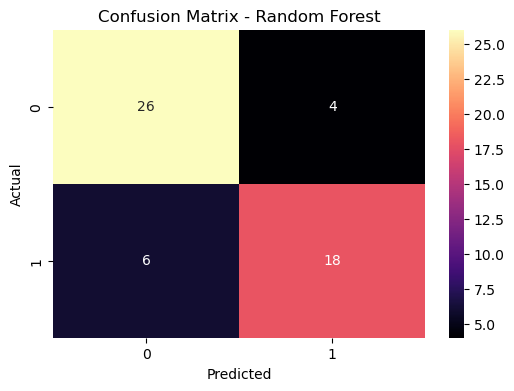


Random Forest Accuracy: 0.87


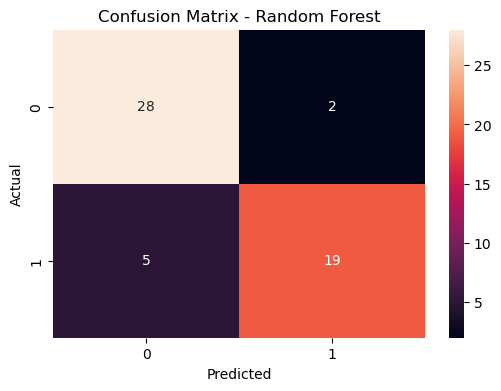

In [24]:
# 1. Logistic Regression w/ confusion matrix
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", round(acc_lr, 3))
#print(y_test, y_pred_lr)

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Random Forest w/ confusion matrix
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", round(acc_rf, 3))
# print(y_test, y_pred_rf)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/var/folders/39/slh4b2n945q0nhsjbxm5r9740000gn/T/ipykernel_41801/1840999943.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='magma_r')


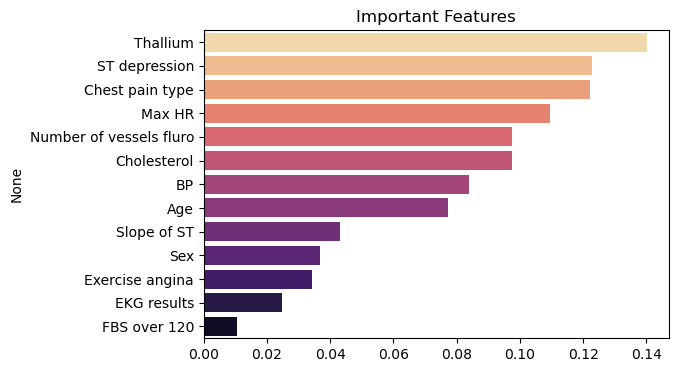

In [25]:
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,4))
sns.barplot(x=importances[indices], y=features[indices], palette='magma_r')
plt.title('Important Features')
plt.show()

In [38]:
ABC = AdaBoostClassifier()
RFC = RandomForestClassifier()
GBC = GradientBoostingClassifier()
HGBC = HistGradientBoostingClassifier()
LR2 = LogisticRegression()

for i in [ABC, RFC, GBC, HGBC, LR2]:     #For Loop iterating over the range of Regressions above (Fitting X_train, y_train and predicting X_test    -    Then R2 score (y_test, y_pred)
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    print(f"Model: {i}", f"R2: {r2:.4f}", f"RMSE: {rmse:.4f}", f"Accuracy: {acc:.4f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoostClassifier() R2: 0.1750 RMSE: 0.4513 Accuracy: 0.7963
Model: RandomForestClassifier() R2: 0.4000 RMSE: 0.3849 Accuracy: 0.8519
Model: GradientBoostingClassifier() R2: 0.2500 RMSE: 0.4303 Accuracy: 0.8148
Model: HistGradientBoostingClassifier() R2: 0.5500 RMSE: 0.3333 Accuracy: 0.8889
Model: LogisticRegression() R2: 0.2500 RMSE: 0.4303 Accuracy: 0.8148


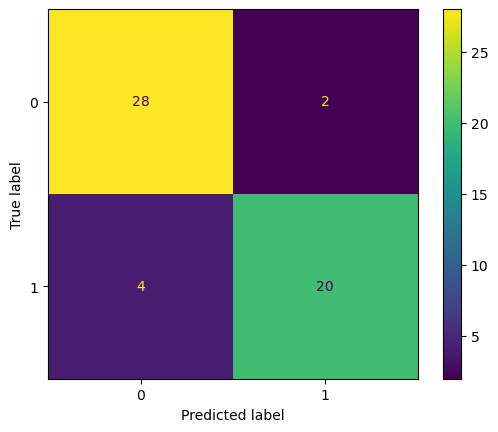

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()
plt.show()